# SimBi Quickstart

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucashofer/simbi/blob/main/docs/notebooks/SimBi_Quickstart.ipynb)

## Installing and Importing

First we install SimBi with pip

In [ ]:
!pip install simbi 

Now let's install some other Python packages which we'll need.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants
import simbi

## Thermal Cloud

We start with simulating a thermal cloud. First, let's define the physics quantities we need starting with the harmonic trap frequencies.

In [30]:
wx = 2 * np.pi * 350
wy = 2 * np.pi * 300
wz = 2 * np.pi * 30
trap_freqs = (wx, wy, wz)

Now we let's define the mass, time-of-flight, the temperature and the chemical potential $\mu$. These are all given in SI units.

In [31]:
amu = physical_constants['atomic mass constant'][0]
m = 87 * amu
t = 0.001
T = 200e-09
mu = 7e-31

Next, we want to define a series of coordinates to calculate the densities. However, we first get the length scales of the thermal cloud after time-of-flight

In [32]:
_, t_sigmas = simbi.get_sigmas(trap_freqs, m, T, mu, t)

We now get coordinate maps for one, two and three dimensions which correspond to the three trapping axes. Furthermore, this built in function also gets the differential elements for each axis, which we can use for numeric integration. 

In [33]:
coords_base, coord_maps, diff_elements, clength = simbi.get_coordinates(t_sigmas, 6, multi=True)
xcoords, ycoords, zcoords = coords_base
coords_3d, coords_2d, coords_1d = coord_maps
dv, da, dx = diff_elements

Although we used a built-in function to get these coordinate maps you can easily use np.meshgrid to create your own. Next, we calculate the full 3D density. Furthermore, we calculate the 2D and 1D densities. For the 2D density the full 3D density has been integrated along the z-axis, whereas for the 1D density the density has been integrated along both the x and z axes.

In [34]:
from simbi import thermal_density

density_3d = simbi.thermal_density(coords_3d, trap_freqs, m, T, -mu, t)
density_2d = simbi.thermal_density(coords_2d, trap_freqs, m, T, -mu, t)
density_1d = simbi.thermal_density(coords_1d, trap_freqs, m, T, -mu, t)

Now let's plot a cut-through of the 3D density distribution

Text(0.5, 1.0, '3D Cut Through')

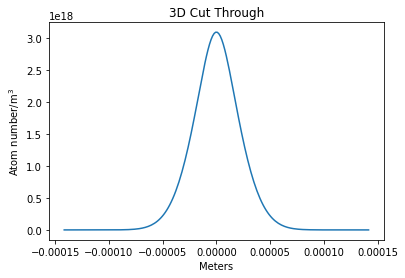

In [35]:
plt.figure()
plt.plot(zcoords, density_3d[int(clength/2), int(clength/2)])
plt.ylabel('Atom number/m$^3$')
plt.xlabel('Meters')
plt.title('3D Cut Through')

Now the 2D density

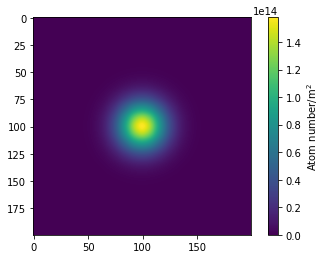

In [36]:
plt.figure()
plt.imshow(density_2d)
plt.pcolormesh(*coords_2d, density_2d)
plt.colorbar(label='Atom number/m$^2$')
plt.show()

And finally the integrated 1D density

Text(0.5, 0, 'Meters')

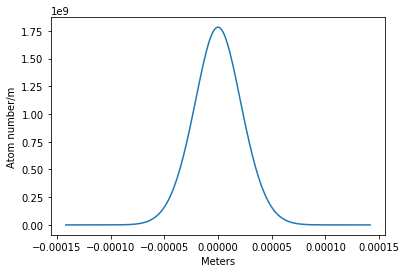

In [37]:
plt.figure()
plt.plot(zcoords, density_1d)
plt.ylabel('Atom number/m')
plt.xlabel('Meters')

Finally, we can analytically calculate the total number of atoms 

In [38]:
simbi.thermal_atom_number(trap_freqs, -mu, T)

20188.357732472745

## Thermal Cloud

Now we can simulate the BEC. We use the same simulation values as above, but additionally include 
the scattering length $a_s$

In [39]:
a0 = physical_constants['Bohr radius'][0]
a = 100 * a0

We want the coordinate grid to match the BEC and so we first calculate the length scales of the BEC at some expansions time $t$ and then get the coordinate maps.

In [40]:
_, _, tf_radii = simbi.get_radii(trap_freqs, m, a, mu, t)
_, coord_maps, diff_elements, clength = simbi.get_coordinates(tf_radii, 2, multi=True)
coords_3d, coords_2d, coords_1d = coord_maps
dv, da, dx = diff_elements

We can now calculate the fulll 3d density, the integrated 2d density and the integrated 1d density (see thermal section for more details).

In [41]:
from simbi.bec import bec_density
density_3d = bec_density(coords_3d, trap_freqs, m, a, mu, t)
int_density_2d = bec_density(coords_2d, trap_freqs, m, a, mu, t)
int_density_1d = bec_density(coords_1d, trap_freqs, m, a, mu, t)

And similar to the thermal cloud we can plot these all out

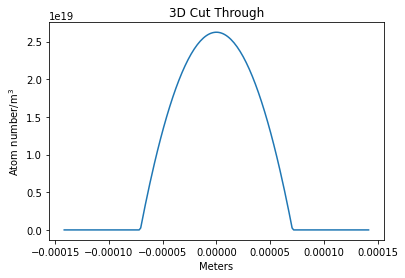

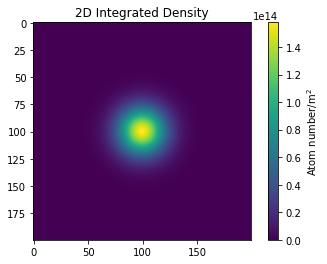

Text(0.5, 0, 'Meters')

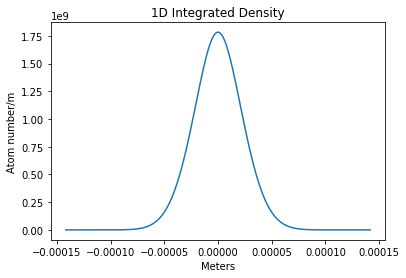

In [42]:
plt.figure()
plt.plot(zcoords, density_3d[int(clength/2), int(clength/2)])
plt.ylabel('Atom number/m$^3$')
plt.xlabel('Meters')
plt.title('3D Cut Through')

plt.figure()
plt.imshow(density_2d)
plt.pcolormesh(*coords_2d, density_2d)
plt.colorbar(label='Atom number/m$^2$')
plt.title('2D Integrated Density')
plt.show()

plt.figure()
plt.plot(zcoords, density_1d)
plt.ylabel('Atom number/m')
plt.title('1D Integrated Density')
plt.xlabel('Meters')

Now we calculate the BEC atom number.

In [48]:
simbi.bec_atom_number(trap_freqs, m, a, mu)

8845.879949750666

## Bimodal Cloud

Often, we wish to simulate a bimodal distribution featuring both a thermal cloud and a BEC. Once 
again, we need to get the length scales to properly calculate our coordinate maps. This time
we return all the length scales, both in-trap and at time-of-flight

In [49]:
all_radii = simbi.bimodal_radii(trap_freqs, m, T, a, mu, t)
init_sigmas, t_sigmas, init_tf_radii, expans_scalars, tf_radii = all_radii

AttributeError: module 'simbi' has no attribute 'bimodal_radii'

We once again use the thermal cloud's length scales as it is larger than the BEC.

In [50]:
(x,y,z), coord_maps, diff_elements, clength = simbi.get_coordinates(t_sigmas, 6, multi=True)
coords_3d, coords_2d, coords_1d = coord_maps
dv, da, dx = diff_elements

Now we calculate the bimodal densities

In [51]:
densities_3d = simbi.bimodal_density(coords_3d, trap_freqs, m, T, a, mu, t)
densities_2d = simbi.bimodal_density(coords_2d, trap_freqs, m, T, a, mu, t)
densities_1d = simbi.bimodal_density(coords_1d, trap_freqs, m, T, a, mu, t)

Finally, we plot the bimodal distributions

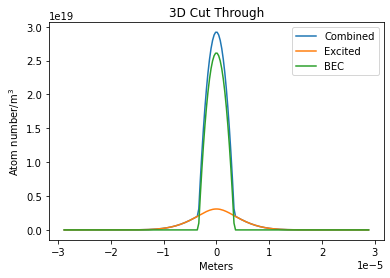

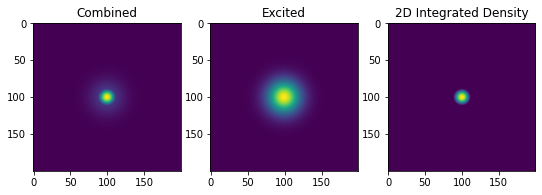

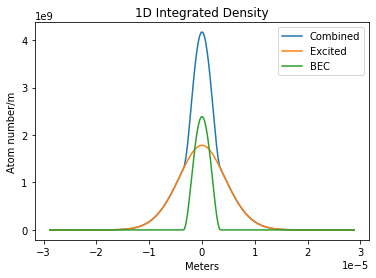

In [52]:
plabels = ['Combined', 'Excited', 'BEC']
slicev = int(clength / 2)

plt.figure()
plt.title('3D Cut-through')
for label, density in zip(plabels, densities_3d):
    plt.plot(x, density[slicev, slicev], label=label)
plt.ylabel('Atom number/m$^3$')
plt.xlabel('Meters')
plt.title('3D Cut Through')
plt.legend()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, label, density in zip(axes, plabels, densities_2d):
    ax.imshow(density)
    ax.set_title(label)
# plt.colorbar(label='Atom number/m$^2$')
plt.title('2D Integrated Density')
    
plt.figure()
plt.title('1D Integrated')
for label, density in zip(plabels, densities_1d):
    plt.plot(x, density, label=label)
plt.ylabel('Atom number/m')
plt.title('1D Integrated Density')
plt.xlabel('Meters')
plt.legend()

Now we calculate all the atom numbers and the condensed fraction.

In [53]:
atom_numbers = simbi.bimodal_atom_numbers(trap_freqs, m, T, a, mu)

plabels = ['Combined', 'Thermal', 'BEC', 'Condensed Fraction']

for num, plabel in zip(atom_numbers, plabels):
    print(f'{plabel}: {num}')

Combined: 29034.23768222341
Thermal: 20188.357732472745
BEC: 8845.879949750666
Condensed Fraction: 0.3046706459652175
